In [116]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound
import random

In [117]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [142]:
df= pd.read_csv("../../data/processed/oline_merge.csv")
df = df[df.year >= df.draft_yr+3]
df = df[df['Percenthit (%)'] <= 6]
# df =df[df.year != 2020]
len(df)

269

In [143]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,year,age,draft_yr,draft_pos,attempts,yards_run,tds_run,longgain_run,...,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,304.513011,304.513011,2015.156134,27.460967,2009.903346,114.553903,132.527881,558.007435,3.866171,36.167286,...,0.921933,9.405204,28.386617,5.827881,2.112268,16.586989,1.587361,16.903346,17.609665,16.130112
std,163.572650,163.572650,3.266429,2.496894,3.845664,93.322592,89.170578,396.784764,3.598913,20.313722,...,1.247925,7.007148,15.419240,1.777976,1.209986,10.729167,1.500245,9.207291,9.091577,9.050531
min,0.000000,0.000000,2005.000000,22.000000,1999.000000,2.000000,2.000000,-3.000000,0.000000,3.000000,...,0.000000,0.000000,3.000000,-0.400000,0.100000,-0.300000,0.000000,1.000000,1.000000,1.000000
25%,178.000000,178.000000,2013.000000,26.000000,2007.000000,36.000000,51.000000,223.000000,1.000000,20.000000,...,0.000000,4.000000,17.000000,4.700000,1.100000,8.400000,0.000000,9.000000,10.000000,8.000000
50%,303.000000,303.000000,2015.000000,27.000000,2010.000000,73.000000,119.000000,473.000000,3.000000,32.000000,...,1.000000,8.000000,25.000000,5.800000,2.000000,14.500000,1.000000,17.000000,18.000000,16.000000
75%,449.000000,449.000000,2018.000000,29.000000,2013.000000,227.000000,206.000000,863.000000,6.000000,48.000000,...,1.000000,13.000000,35.000000,6.600000,2.900000,23.400000,3.000000,24.000000,25.000000,24.000000
max,599.000000,599.000000,2020.000000,37.000000,2017.000000,257.000000,392.000000,1845.000000,18.000000,97.000000,...,7.000000,32.000000,80.000000,12.200000,6.300000,58.700000,6.000000,32.000000,32.000000,32.000000


In [144]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

df = df.drop('yardspergame_run',axis=1)
df = df.drop('yardsperatt',axis=1)
df = df.drop('yardspertarget',axis=1)
df = df.drop('yardsperrec',axis=1)
df = df.drop('recpergame',axis=1)
df = df.drop('yardspergame_rec',axis=1)

# df = df.drop('yards_run',axis=1)
# df = df.drop('yards_rec',axis=1)
# df = df.drop('attempts',axis=1)
# df = df.drop('rec',axis=1)
# df = df.drop('recpergame',axis=1)
# df = df.drop('yardspergame_rec',axis=1)
# df = df.drop('yardspergame_run',axis=1)
# df = df.drop('tgt',axis=1)

df.describe()


,age,draft_pos,attempts,yards_run,tds_run,longgain_run,Percenthit (%),g,gs,tgt,rec,yards_rec,tds_rec,firstdowns,longgain_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,27.460967,114.553903,132.527881,558.007435,3.866171,36.167286,2.016015,12.472119,7.312268,35.271375,26.483271,210.040892,0.921933,9.405204,28.386617,1.587361,16.903346,17.609665,16.130112
std,2.496894,93.322592,89.170578,396.784764,3.598913,20.313722,1.460674,3.843506,5.576393,22.832877,17.482526,149.632816,1.247925,7.007148,15.419240,1.500245,9.207291,9.091577,9.050531
min,22.000000,2.000000,2.000000,-3.000000,0.000000,3.000000,0.100644,1.000000,0.000000,2.000000,2.000000,-2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000
25%,26.000000,36.000000,51.000000,223.000000,1.000000,20.000000,0.727987,10.000000,2.000000,16.000000,12.000000,87.000000,0.000000,4.000000,17.000000,0.000000,9.000000,10.000000,8.000000
50%,27.000000,73.000000,119.000000,473.000000,3.000000,32.000000,1.658375,14.000000,7.000000,30.000000,22.000000,180.000000,1.000000,8.000000,25.000000,1.000000,17.000000,18.000000,16.000000
75%,29.000000,227.000000,206.000000,863.000000,6.000000,48.000000,2.886179,16.000000,12.000000,51.000000,38.000000,314.000000,1.000000,13.000000,35.000000,3.000000,24.000000,25.000000,24.000000
max,37.000000,257.000000,392.000000,1845.000000,18.000000,97.000000,5.944167,16.000000,16.000000,104.000000,77.000000,704.000000,7.000000,32.000000,80.000000,6.000000,32.000000,32.000000,32.000000


In [145]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [146]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
esv = []
# while True: 
for i in range(200):
    
    X_train.shape
    model = Sequential()

    model.add(Dense(16, activation="relu"))
    
    a=random.randint(18,21)
    b=random.randint(35,37)
    c=random.randint(28,30)
#     d=random.randint()

#     a=random.randint(35,37)
#     b=random.randint(35,37)
#     c=random.randint(35,37)
    
    model.add(Dense(a, activation="relu"))
    model.add(Dense(b, activation="relu"))
    model.add(Dense(c, activation="relu"))
    
    
    print('a= ',a,', b= ',b,', c= ',c)
    
#     model.add(Dense(random.randint(30,40), activation="relu"))
    
#     model.add(Dense(random.randint(30,40), activation="relu"))
    

    model.add(Dense(1))

    model.compile(optimizer="sgd", loss="mse")
    model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=50)
    
    predictions = model.predict(X_test)
    esv.append(explained_variance_score(y_test,predictions))
    print('\n'+'\n'+"ESV: " + str(explained_variance_score(y_test,predictions))+ '\n'+'\n'+'\n')
    if(explained_variance_score(y_test,predictions) > .50):
        winsound.Beep(1047, 62)
        break
#     winsound.Beep(1397,250)

esv.sort(reverse=True)
print("\n")
print("MAX: " + str(max(esv)))
print("AVG: " + str(sum(esv)/len(esv)))
print('\n')
print(esv)
winsound.Beep(784, 62)

a=  20 , b=  37 , c=  30
Epoch 1/50
7/7 [==============================] - 0s 16ms/step - loss: 4.8680 - val_loss: 3.3945
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 2.9250 - val_loss: 2.1847
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 2.1426 - val_loss: 1.8464
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 1.9628 - val_loss: 1.7705
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 1.8809 - val_loss: 1.7000
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 1.8239 - val_loss: 1.6509
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 1.7721 - val_loss: 1.6176
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 1.7026 - val_loss: 1.5787
Epoch 9/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6926 - val_loss: 1.5680
Epoch 10/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6647 - val_loss: 1.5411
Epoch 11/50
7

7/7 [==============================] - 0s 4ms/step - loss: 1.5587 - val_loss: 1.5478
Epoch 35/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5935 - val_loss: 1.5683
Epoch 36/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5932 - val_loss: 1.5752
Epoch 37/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5687 - val_loss: 1.6030
Epoch 38/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5552 - val_loss: 1.5318
Epoch 39/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5977 - val_loss: 1.5309
Epoch 40/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5566 - val_loss: 1.5519
Epoch 41/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5195 - val_loss: 1.6060
Epoch 42/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5567 - val_loss: 1.5313
Epoch 43/50
7/7 [==============================] - 0s 4ms/step - loss: 1.5397 - val_loss: 1.5340
Epoch 44/50
7/7 [=========================

Epoch 10/50
7/7 [==============================] - 0s 5ms/step - loss: 1.7185 - val_loss: 1.7317
Epoch 11/50
7/7 [==============================] - 0s 5ms/step - loss: 1.6891 - val_loss: 1.6400
Epoch 12/50
7/7 [==============================] - 0s 6ms/step - loss: 1.7041 - val_loss: 1.6405
Epoch 13/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6673 - val_loss: 1.7194
Epoch 14/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6441 - val_loss: 1.6378
Epoch 15/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6231 - val_loss: 1.6295
Epoch 16/50
7/7 [==============================] - 0s 3ms/step - loss: 1.6063 - val_loss: 1.6896
Epoch 17/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6024 - val_loss: 1.6996
Epoch 18/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6155 - val_loss: 1.6556
Epoch 19/50
7/7 [==============================] - 0s 5ms/step - loss: 1.6148 - val_loss: 1.6040
Epoch 20/50
7/7 [=============

In [ ]:
predictions = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

Text(0, 0.5, 'real')

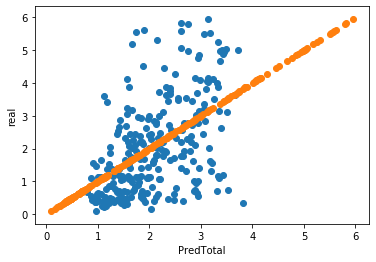

In [136]:
X_scl = scaler.fit_transform(X)
predTotal = model.predict(X_scl)
plt.scatter(predTotal,y)
plt.scatter(y,y)
plt.xlabel("PredTotal")
plt.ylabel('real')

In [138]:
bigpred = [i for i in predTotal if i >= 5] 
bigpred

[]

In [127]:
rbs =pd.read_csv("../../data/rbs_to_predict.csv")
names = rbs['playername'].values
rbs = rbs.drop('tm',axis=1)
rbs = rbs.drop('playername',axis=1)
for i in range(len(names)):
    print(names[i])
    print(rbs.iloc[i].to_numpy())
    print(model.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1))))

Aaron Jones
[  27  182  201 1104    9   77   14   14   63   47  355    2   15   30
    2    5    3    1]
[[2.530226]]
Kenyan Drake
[ 27  73 239 955  10  69  15  13  31  25 137   0   5  18   3  30  19  25]
[[4.3478208]]
Gus Edwards
[ 26  -1 144 723   6  36  16   6  13   9 129   0   4  34   1   8   1   5]
[[2.126562]]
James Conner
[ 26 205 169 721   6  59  13  11  43  35 215   0  10  18   2  32  32  28]
[[2.7900069]]
Todd Gurley
[ 27  10 195 678   9  35  15  15  35  25 164   0   7  26   2  24  28  27]
[[4.470445]]
Frank Gore
[ 38  65 187 653   2  17  15  14  19  16  89   0   3   9   1  31  31  25]
[[4.195106]]
Chris Carson
[ 27 249 141 681   5  29  12  12  46  37 287   4  14  29   1  10  15  17]
[[2.0280163]]


In [139]:
#model.save('./savedmodels/April27-norookie')

In [141]:
loaded_model = tf.keras.models.load_model('./savedmodels/April27-norookie')
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  1.6054468179240988
RMSE:  1.2670622786288364
MAE:  1.026819335812559
ESV:  0.360537266380878


In [106]:
from sklearn.linear_model import LinearRegression

MAE: 1.0093671351155022
MSE: 1.4372892800100965
RMSE: 1.198870001297095
ESV:  0.35681227596159537


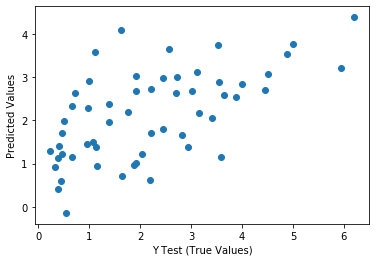

In [107]:
from sklearn import metrics
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("Y Test (True Values)")
plt.ylabel("Predicted Values")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print("ESV: ", explained_variance_score(y_test, predictions))

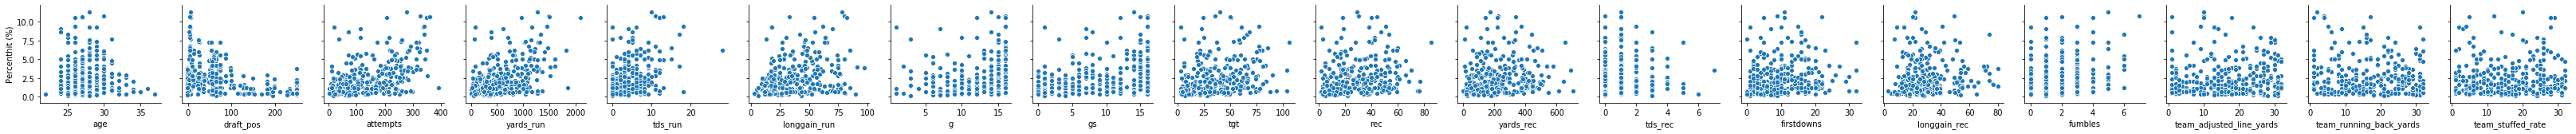

In [54]:
sns.pairplot(df,x_vars=['age','draft_pos','attempts','yards_run','tds_run','longgain_run','g','gs','tgt','rec','yards_rec','tds_rec','firstdowns','longgain_rec','fumbles','team_adjusted_line_yards','team_running_back_yards','team_stuffed_rate'],y_vars=['Percenthit (%)'])